In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
n=pd.read_csv("/content/BankChurners.csv")

 


In [34]:
n.shape

(10127, 23)

In [35]:
n.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [36]:
n.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [37]:
n.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

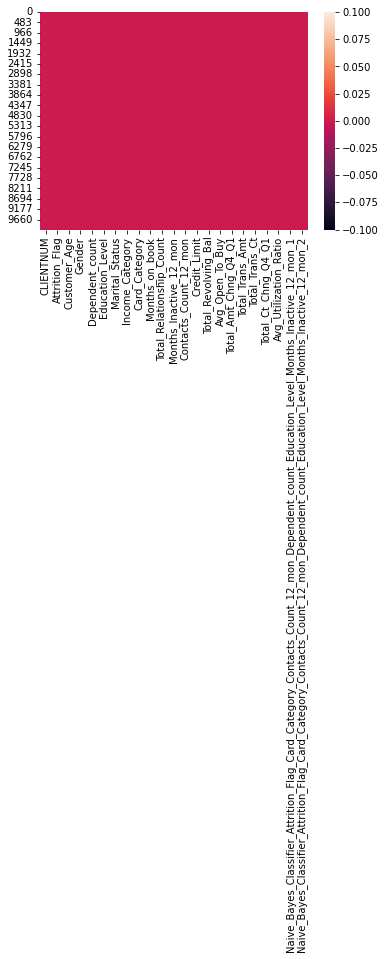

In [38]:
sns.heatmap(n.isnull())

In [39]:
x=n.iloc[:,1:16].values
y=n.iloc[:,-3].values


In [40]:
x

array([['Existing Customer', 45, 'M', ..., 12691.0, 777, 11914.0],
       ['Existing Customer', 49, 'F', ..., 8256.0, 864, 7392.0],
       ['Existing Customer', 51, 'M', ..., 3418.0, 0, 3418.0],
       ...,
       ['Attrited Customer', 44, 'F', ..., 5409.0, 0, 5409.0],
       ['Attrited Customer', 30, 'M', ..., 5281.0, 0, 5281.0],
       ['Attrited Customer', 43, 'F', ..., 10388.0, 1961, 8427.0]],
      dtype=object)

In [41]:
y

array([0.061, 0.105, 0.   , ..., 0.   , 0.   , 0.189])

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])
x


array([[1, 45, 'M', ..., 12691.0, 777, 11914.0],
       [1, 49, 'F', ..., 8256.0, 864, 7392.0],
       [1, 51, 'M', ..., 3418.0, 0, 3418.0],
       ...,
       [0, 44, 'F', ..., 5409.0, 0, 5409.0],
       [0, 30, 'M', ..., 5281.0, 0, 5281.0],
       [0, 43, 'F', ..., 10388.0, 1961, 8427.0]], dtype=object)

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])
x

array([[1, 45, 1, ..., 12691.0, 777, 11914.0],
       [1, 49, 0, ..., 8256.0, 864, 7392.0],
       [1, 51, 1, ..., 3418.0, 0, 3418.0],
       ...,
       [0, 44, 0, ..., 5409.0, 0, 5409.0],
       [0, 30, 1, ..., 5281.0, 0, 5281.0],
       [0, 43, 0, ..., 10388.0, 1961, 8427.0]], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,5]=le.fit_transform(x[:,5])
x

array([[1, 45, 1, ..., 12691.0, 777, 11914.0],
       [1, 49, 0, ..., 8256.0, 864, 7392.0],
       [1, 51, 1, ..., 3418.0, 0, 3418.0],
       ...,
       [0, 44, 0, ..., 5409.0, 0, 5409.0],
       [0, 30, 1, ..., 5281.0, 0, 5281.0],
       [0, 43, 0, ..., 10388.0, 1961, 8427.0]], dtype=object)

In [47]:
x

array([[1, 45, 1, ..., 12691.0, 777, 11914.0],
       [1, 49, 0, ..., 8256.0, 864, 7392.0],
       [1, 51, 1, ..., 3418.0, 0, 3418.0],
       ...,
       [0, 44, 0, ..., 5409.0, 0, 5409.0],
       [0, 30, 1, ..., 5281.0, 0, 5281.0],
       [0, 43, 0, ..., 10388.0, 1961, 8427.0]], dtype=object)

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,7]=le.fit_transform(x[:,7])
x

array([[1, 45, 1, ..., 12691.0, 777, 11914.0],
       [1, 49, 0, ..., 8256.0, 864, 7392.0],
       [1, 51, 1, ..., 3418.0, 0, 3418.0],
       ...,
       [0, 44, 0, ..., 5409.0, 0, 5409.0],
       [0, 30, 1, ..., 5281.0, 0, 5281.0],
       [0, 43, 0, ..., 10388.0, 1961, 8427.0]], dtype=object)

In [57]:
#x["Card_Category"]
x[:,7:8]

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [3]], dtype=object)